# Project 1: Cyclic Coordinate Descent for Regularized Logistic Regression

## Datasets

dataset1

dataset2

dataset3

dataset4

dataset_synthetic

In [45]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

## dataset1

## dataset2

## dataset3

## dataset4

## Synthetic dataset

In [41]:
def generate_synthetic_data(p, n, d, g):
    """
    Generate a synthetic dataset based on the given parameters.
    
    Parameters
    ----------
        p: float
            Prior probability for class Y=1.
        n: int
            Number of observations.
        d:  int
            Dimensionality of feature space.
        g: float 
            Covariance decay factor.
    
    Returns
    ----------
        DataFrame: A DataFrame containing generated features and class labels.
    """
    
    # Generate binry class variable
    Y = np.random.binomial(1, p, size=n)

    # Define means for multivariate normal distribution
    mean_0 = np.zeros(d)
    mean_1 = np.array([1 / (i + 1) for i in range(d)])

    # Define covariance matrix S
    indices = np.arange(d)
    S = np.array([[g ** np.abs(i - j) for j in indices] for i in indices])
    
    # Create DataFrame
    X = np.array([
        np.random.multivariate_normal(mean_1 if y == 1 else mean_0, S)
        for y in Y
    ])
    columns = [f'X{i+1}' for i in range(d)]
    df = pd.DataFrame(X, columns=columns)
    df['Y'] = Y
    
    return df


In [78]:
p = 0.5
n = 10000
d = 5
g = 0.1

synthetic_df = generate_synthetic_data(p, n, d, g)
synthetic_df.head()

X1        X2        X3        X4        X5  Y
0  0.544374 -0.948704 -0.921696  0.822097 -0.553486  0
1  0.342765 -0.021391  0.897325 -0.437719 -0.758080  0
2 -0.465409 -0.126490  0.423606  2.935712  1.265766  1
3  0.036103 -1.430249  0.743583 -1.341123  1.974809  0
4  1.922510  0.478072 -0.056049 -0.885558  1.204390  0

In [79]:
synthetic_df[synthetic_df["Y"]==0].describe()

X1           X2           X3           X4           X5       Y
count  4985.000000  4985.000000  4985.000000  4985.000000  4985.000000  4985.0
mean     -0.005843     0.013012    -0.008966     0.011189    -0.023706     0.0
std       1.008804     1.009712     1.009051     1.017420     0.996470     0.0
min      -3.228552    -3.648926    -3.345775    -3.613802    -3.670821     0.0
25%      -0.695433    -0.658011    -0.693797    -0.671829    -0.691199     0.0
50%      -0.012047     0.017132    -0.013956     0.007224    -0.005686     0.0
75%       0.692315     0.671278     0.667609     0.690285     0.616759     0.0
max       3.692258     4.310026     4.332952     3.475682     3.797591     0.0

In [80]:
synthetic_df[synthetic_df["Y"]==1].describe()

X1           X2           X3           X4           X5       Y
count  5015.000000  5015.000000  5015.000000  5015.000000  5015.000000  5015.0
mean      0.995014     0.490953     0.306833     0.219753     0.228336     1.0
std       1.000797     1.015712     1.004891     1.003777     0.994056     0.0
min      -2.838056    -3.000079    -3.036036    -3.570806    -3.097657     1.0
25%       0.332011    -0.209926    -0.372153    -0.457985    -0.433391     1.0
50%       0.991025     0.501033     0.303558     0.235016     0.233196     1.0
75%       1.677311     1.192445     0.968752     0.881883     0.897079     1.0
max       5.474773     4.742176     4.081214     3.761513     4.465162     1.0

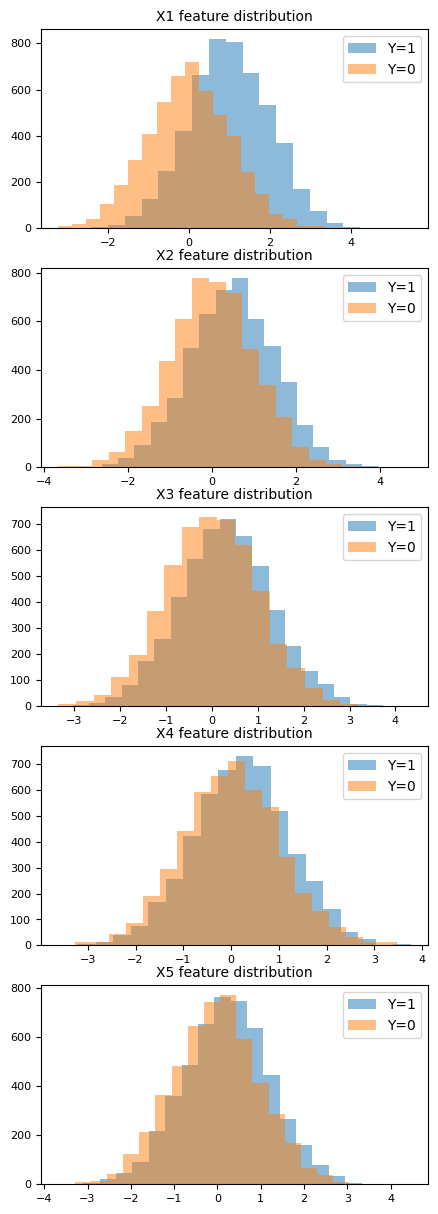

In [109]:
bins = 20

fig = plt.figure(figsize=(5, 15))
for i in range(d): 
    plt.subplot(5, 1, i+1)
    plt.hist(synthetic_df[synthetic_df["Y"]==1][f"X{i+1}"], bins=bins, alpha=0.5, label="Y=1")
    plt.hist(synthetic_df[synthetic_df["Y"]==0][f"X{i+1}"], bins=bins, alpha=0.5, label="Y=0")
    plt.legend(loc='upper right')
    plt.gca().set_title(f"X{i+1} feature distribution", fontsize=10)
    plt.gca().tick_params(labelsize=8)

plt.show()